<a href="https://colab.research.google.com/github/juniorPalomino25/Python/blob/main/Laboratorio_0R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar librerias**

Instalación de neurolab para poder utilizarlo

In [ ]:
!pip install neurolab

     |████████████████████████████████| 645 kB 19.7 MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22180 sha256=f659d747d19c7a3a67a0d0ef6755b59a8ee878504bd9a83e9befc06e6118b7e3
  Stored in directory: /root/.cache/pip/wheels/3e/07/63/e3d6e066089d7186465184a6f9a1884471485f38beef1edeaa
Successfully built neurolab


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# **Cargar los datos**

In [ ]:
data = np.loadtxt('data_or.txt')
print(data)

[[1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 0.]]


In [ ]:
type(data)

numpy.ndarray

In [ ]:
data.shape

(4, 3)

# **Separamos entradas y salidas**

In [ ]:
#Entrada
X = data[:,0:2]
print(X)

[[1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]


In [ ]:
#Salida
y = data[:,2].reshape(data.shape[0],1)
print(y)

[[1.]
 [1.]
 [1.]
 [0.]]


Text(0.5, 1.0, 'Datos de Entrada')

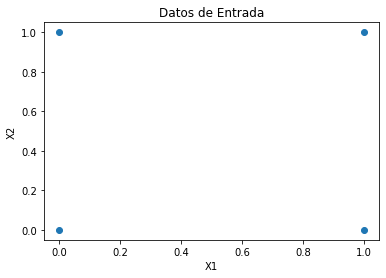

In [ ]:
#Gráficos de data
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Entrada')

# **Definir el mínimo y máximo para cada entrada**

In [ ]:
x1_min, x1_max = data[:,0].min(), data[:,0].max()

In [ ]:
x2_min, x2_max = data[:,1].min(), data[:,1].max()

In [ ]:
print(x1_min,x1_max,x2_min,x2_max)

0.0 1.0 0.0 1.0


# **Numero de neuronas en la capa de salida**

In [ ]:
num_salidas = y.shape[1]
print(num_salidas)

1


# **Definir un perceptron con 2 neuronas de entrada y 1 de salida**



In [ ]:
x1 = [x1_min,x1_max]
x2 = [x2_min,x2_max]
perceptron = nl.net.newp([x1,x2],num_salidas)

# **Entrenar el perceptron usando la data**

In [ ]:
progreso_error = perceptron.train(X,y,epochs=100,show=20,lr=0.03)

The goal of learning is reached


# **Gráfico del progreso de entrenamiento**

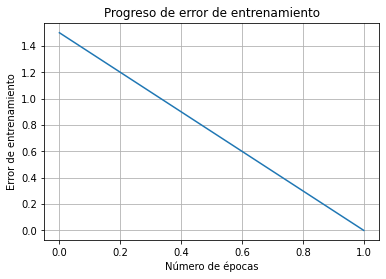

In [ ]:
plt.figure()
plt.plot(progreso_error)
plt.xlabel('Número de épocas')
plt.ylabel('Error de entrenamiento')
plt.title('Progreso de error de entrenamiento')
plt.grid()

In [ ]:
print('\nResultados de Prueba:')
datos_prueba = [[0.89,0.55],[0.38,0.19],[0.47,0.47]]
for item in datos_prueba:
  print(item, '--->',perceptron.sim([item]))


Resultados de Prueba:
[0.89, 0.55] ---> [[1.]]
[0.38, 0.19] ---> [[1.]]
[0.47, 0.47] ---> [[1.]]


# **Guardar y cargar una red neuronal entrenada**

In [ ]:
# Save network in file
perceptron.save('perceptron.net')
# Load network
# net = nl.load('test.net')